In [37]:
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
pd = pd.read_csv('BTC_EUR.csv', index_col='Date', parse_dates=True)

In [39]:
pd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


<AxesSubplot:xlabel='Date'>

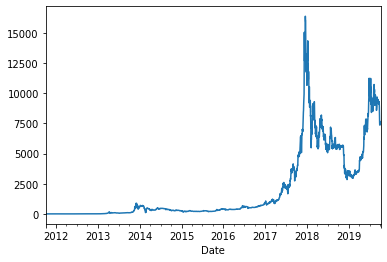

In [40]:
pd['Close'].plot()

In [41]:
pd.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

In [42]:
bitcoin = pd

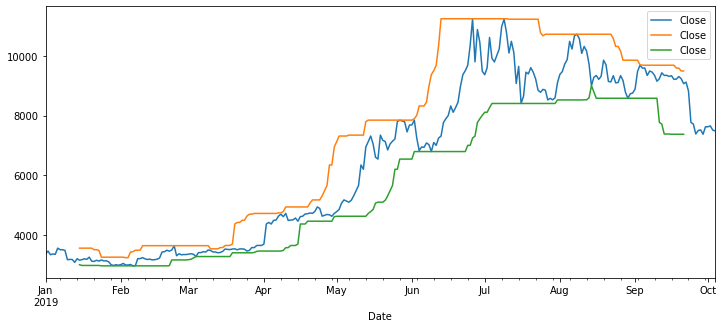

In [43]:
plt.figure(figsize=(12,5))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=28, center=True).max().plot()
bitcoin.loc['2019', 'Close'].rolling(window=28, center=True).min().plot()
plt.legend()
plt.show()

In [44]:
import numpy as np

In [45]:
turtle = bitcoin.copy()
turtle['Buy'] = np.zeros(len(turtle))
turtle['Sell'] = np.zeros(len(turtle))

In [46]:
bitcoin.loc['2019', 'Close'].rolling(window=28, center=True).max()

Date
2019-01-01   NaN
2019-01-02   NaN
2019-01-03   NaN
2019-01-04   NaN
2019-01-05   NaN
              ..
2019-09-30   NaN
2019-10-01   NaN
2019-10-02   NaN
2019-10-03   NaN
2019-10-04   NaN
Name: Close, Length: 277, dtype: float64

In [47]:
bitcoin.loc['2019', 'Close']

Date
2019-01-01    3372.090088
2019-01-02    3468.399902
2019-01-03    3345.330078
2019-01-04    3370.939941
2019-01-05    3359.159912
                 ...     
2019-09-30    7626.029785
2019-10-01    7625.560059
2019-10-02    7655.250000
2019-10-03    7516.790039
2019-10-04    7487.083496
Name: Close, Length: 277, dtype: float64

In [48]:
#We create the rolling rows to then compare them with the close row later
turtle['RollingMax'] = turtle['Close'].shift(1).rolling(window=28).max()
turtle['RollingMin'] = turtle['Close'].shift(1).rolling(window=28).min()

In [49]:
# value de buy is one when rolling max is lower than close
turtle.loc[turtle['RollingMax'] < turtle['Close'], 'Buy'] = 1
# value Sell is -1 when rolling min is greater than close
turtle.loc[turtle['RollingMin'] > turtle['Close'], 'Sell'] = -1

/tmp/ipykernel_3112/684219270.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


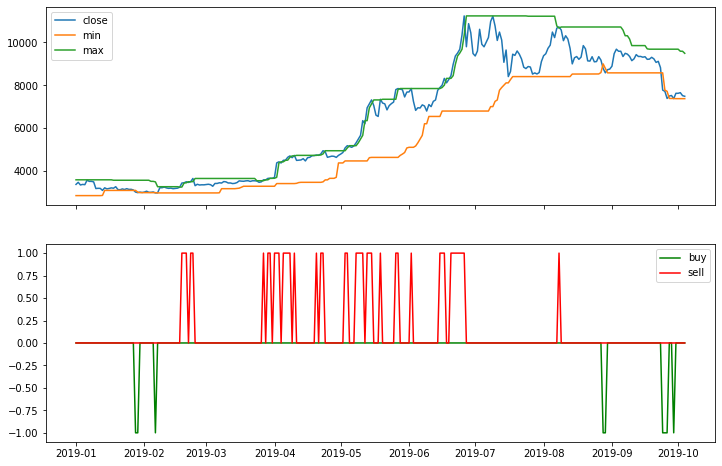

In [50]:
start = '2019'
end = '2019'
fig, ax = plt.subplots(2, figsize=(12,8), sharex=True)
ax[0].plot(turtle['Close'][start:end])
ax[0].plot(turtle['RollingMin'][start:end])
ax[0].plot(turtle['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(turtle['Sell'][start:end], c='g')
ax[1].plot(turtle['Buy'][start:end], c='r')
ax[1].legend(['buy', 'sell'])
fig.show()